In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# 设定目录路径
dir_path = "H_Env_Pen_MixedEnv_MBRL_Client=3"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

In [3]:
file_names

['0_reward_logs.npy',
 '1_reward_logs.npy',
 '2_reward_logs.npy',
 '3_reward_logs.npy',
 '4_reward_logs.npy']

In [4]:
# 设定目录路径
dir_path = "H_Env_Pen_MixedEnv_MBRL_Client=3"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

# 按文件名中的数字排序
file_names.sort(key=lambda x: int(x.split('_')[0]))

# 读取每个文件中的数据
rewards = []
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    reward_data = np.load(file_path)
    rewards.append(reward_data)



In [5]:
len(rewards)

5

In [6]:
rewards[0].shape

(30, 3)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all_experiments(rewards, plot_individual_envs=False):
    num_experiments = len(rewards)
    num_rounds, num_envs = rewards[0].shape

    all_rewards = np.array(rewards)
    
    # 计算每个环境的均值和方差
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    # 计算所有环境的均值和方差
    avg_mean_rewards = np.mean(mean_rewards, axis=1)
    avg_std_rewards = np.std(mean_rewards, axis=1)

    # 打印每个环境的最终奖励值和方差
    print("Final rewards and standard deviations for each environment:")
    for env in range(num_envs):
        final_mean_reward = mean_rewards[-1, env]
        final_std_reward = std_rewards[-1, env]
        print(f"Environment {env + 1} - Final Mean Reward: {final_mean_reward:.2f}, Final Std Dev: {final_std_reward:.2f}")

    # 打印所有环境的最终奖励值和方差
    final_avg_mean_reward = avg_mean_rewards[-1]
    final_avg_std_reward = avg_std_rewards[-1]
    print(f"All Environments - Final Average Mean Reward: {final_avg_mean_reward:.2f}, Final Std Dev: {final_avg_std_reward:.2f}")

    if plot_individual_envs:
        for env in range(num_envs):
            plt.figure(figsize=(12, 8), dpi=100)
            plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
            plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
            
            plt.xlabel('Rounds', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title(f'Mean Rewards for Environment {env + 1}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True)  # 添加网格线
            plt.show()
        
        # 绘制平均值的图
        plt.figure(figsize=(12, 8), dpi=100)
        plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
        plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)
        
        plt.xlabel('Rounds', fontsize=14)
        plt.ylabel('Reward', fontsize=14)
        plt.title('Mean Rewards Across All Experiments', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)  # 添加网格线
        plt.show()

    # 绘制所有环境的均值和方差
    plt.figure(figsize=(12, 8), dpi=100)
    for env in range(num_envs):
        plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
        plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
    
    plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
    plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)

    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Mean Rewards Across All Experiments', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)  # 添加网格线
    plt.show()


Final rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -288.13, Final Std Dev: 107.95
Environment 2 - Final Mean Reward: -277.73, Final Std Dev: 101.81
Environment 3 - Final Mean Reward: -272.22, Final Std Dev: 117.30
All Environments - Final Average Mean Reward: -279.36, Final Std Dev: 6.60


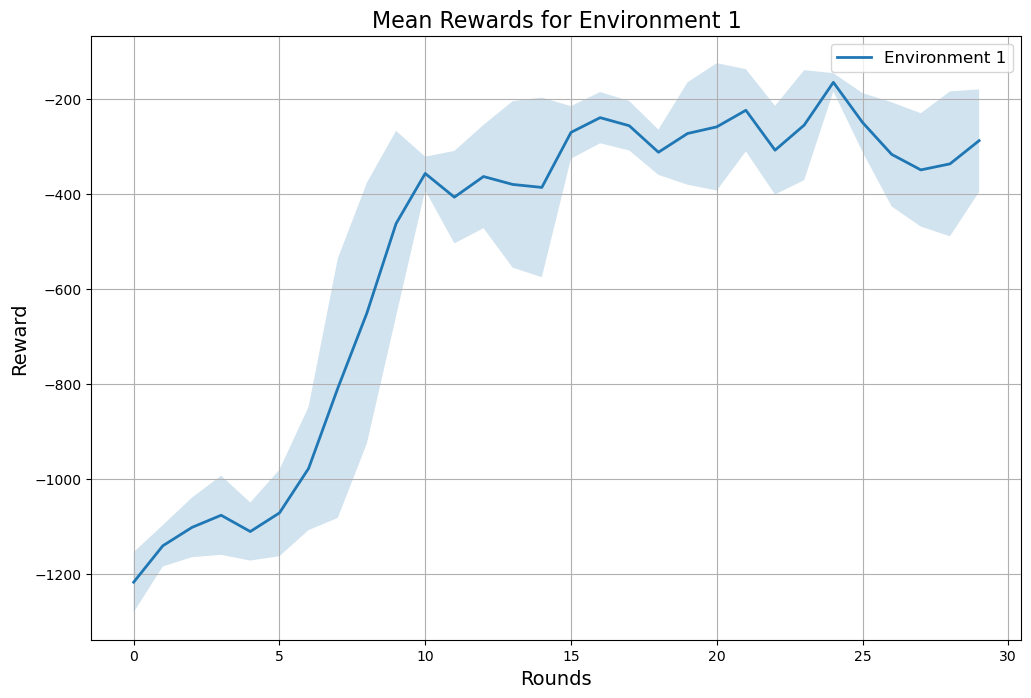

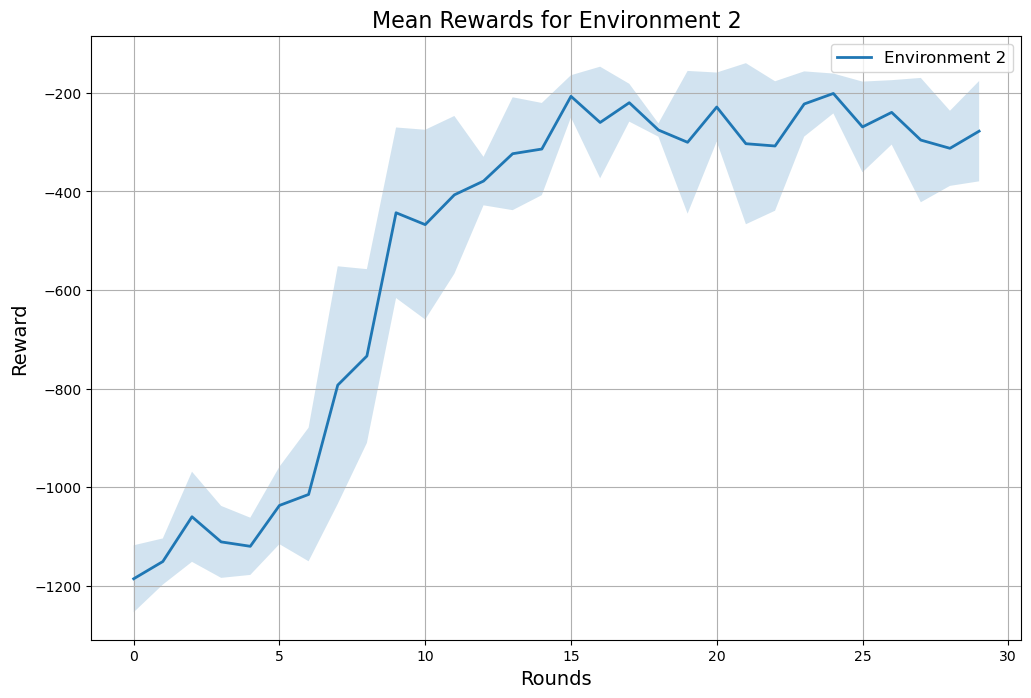

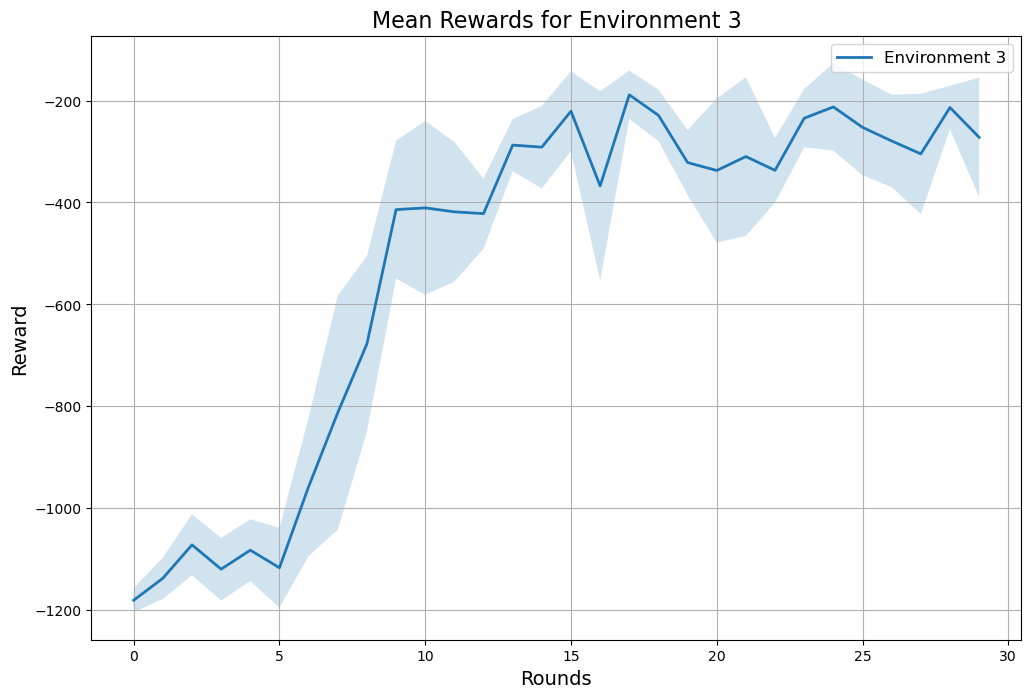

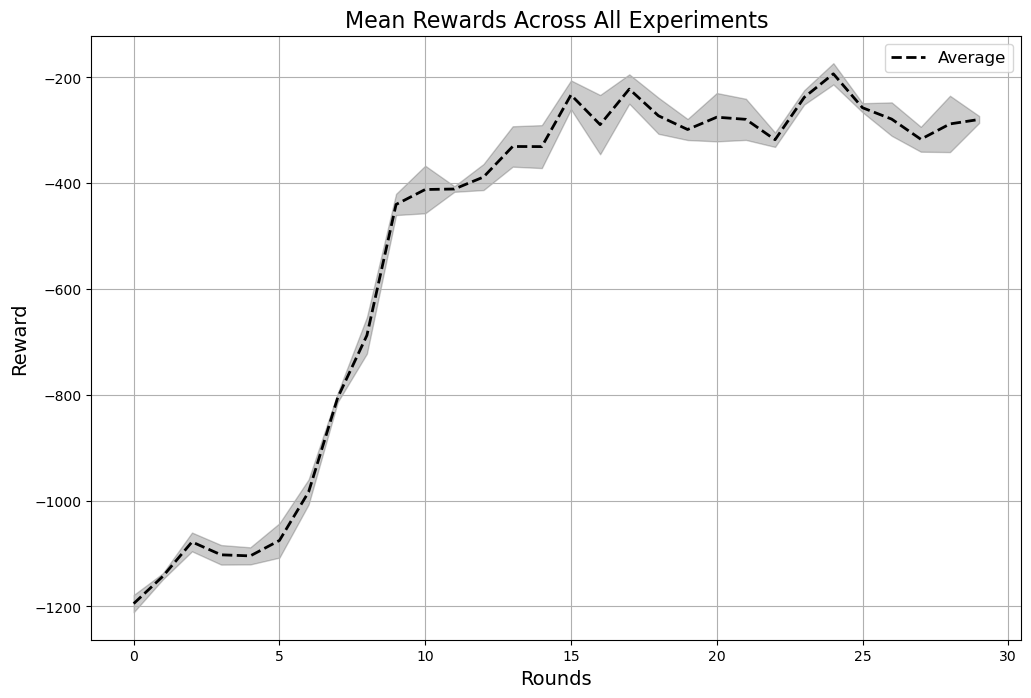

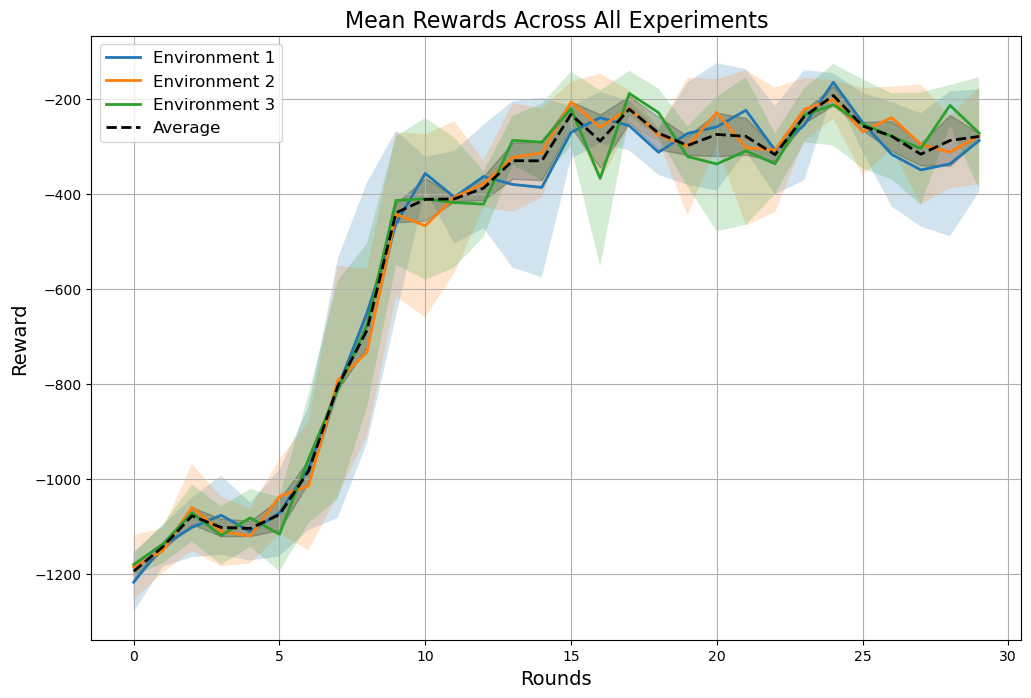

In [8]:
# 绘制所有实验的结果，设置plot_individual_envs=True以单独绘制每个环境的图
plot_all_experiments(rewards, plot_individual_envs=True)

In [9]:
env_avg_rewards = []
env_avg_rewards = []
for expId in range(len(rewards)):
    print(expId)
    env_avg_rewards.append(np.mean(rewards[expId], axis=1))

0
1
2
3
4


In [10]:
env_avg_rewards

[array([-1160.69378335, -1125.08806119, -1006.64060673, -1158.86816791,
        -1153.72216302, -1147.98109729,  -980.32513975,  -922.69388001,
         -469.0929897 ,  -226.27023485,  -271.97604631,  -457.28047044,
         -352.28755057,  -268.77454038,  -286.14646745,  -244.40869126,
         -345.67117958,  -221.34740171,  -264.48521389,  -222.69391419,
         -185.37229909,  -146.92996151,  -206.86029271,  -188.28259763,
         -176.60309621,  -156.47598184,  -171.39381843,  -207.87552471,
         -289.83593493,  -177.94630327]),
 array([-1204.30290825, -1104.10430205, -1150.33559975, -1034.26680724,
        -1078.82083845,  -993.52567292,  -745.6099683 ,  -336.8408816 ,
         -456.9146354 ,  -299.95319124,  -463.19132099,  -415.12809803,
         -322.45031699,  -281.24822794,  -283.16865676,  -219.2206578 ,
         -145.53967637,  -216.15476009,  -326.04877711,  -395.45220727,
         -263.40436176,  -523.59807009,  -386.53150385,  -222.27767282,
         -132.64420615

In [11]:
save_dir = "Res_H_Env_Pen"
file_name = f"MixedEnv_FMRL_Baseline_EnsNum=3.npy"
np.save(os.path.join(save_dir, file_name), env_avg_rewards)